# Body Type Women Classification

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pandas as pd

#import data set

dataset = pd.read_csv('ArabWomenClass.csv') # this will automatically name your columns if your csv has headers

#if your csv does not have headers:
#df.columns = ['Bad Indicator', 'ColumnName1', 'ColumnName2',..]


X = dataset[['Weight', 'Height']].to_numpy()
y = dataset["Sport"] .values

#X = df["YEAR"]   #Feature Matrix
#Y = df["WORLD_FEM_PERC"]          #Target Variable

#df.head()

sport= [X,y]
print("Data : " ,sport)
#print("X.shape: {}".format(sport.shape))
print( type(sport), len(X))


Data :  [array([[58.  ,  1.6 ],
       [58.  ,  1.6 ],
       [58.  ,  1.6 ],
       [40.  ,  1.59],
       [40.  ,  1.59],
       [40.  ,  1.59],
       [40.  ,  1.59],
       [47.  ,  1.66],
       [47.  ,  1.66],
       [47.  ,  1.66],
       [47.  ,  1.66],
       [47.  ,  1.66],
       [47.  ,  1.66],
       [47.  ,  1.66],
       [47.  ,  1.66],
       [65.  ,  1.74],
       [65.  ,  1.74],
       [65.  ,  1.74],
       [49.  ,  1.58],
       [49.  ,  1.58],
       [49.  ,  1.58],
       [49.  ,  1.58],
       [48.  ,  1.66],
       [50.  ,  1.68],
       [50.  ,  1.68],
       [50.  ,  1.62],
       [51.  ,  1.74],
       [51.  ,  1.74],
       [51.  ,  1.74],
       [63.  ,  1.58],
       [75.  ,  1.74],
       [75.  ,  1.74],
       [75.  ,  1.74],
       [75.  ,  1.74],
       [75.  ,  1.74],
       [75.  ,  1.74],
       [54.  ,  1.62],
       [54.  ,  1.62],
       [63.  ,  1.65],
       [63.  ,  1.65],
       [62.  ,  1.83],
       [62.  ,  1.83],
       [62.  ,  1.83],
  

# Split in training and test set

In [6]:
from sklearn.model_selection import train_test_split

X_train_nointerac, X_test_nointerac, y_train, y_test = train_test_split(X, y, random_state=0)
print (X_train_nointerac)
print( y_train)

[[75.    1.74]
 [54.    1.62]
 [48.    1.66]
 [47.    1.66]
 [47.    1.66]
 [75.    1.74]
 [57.    1.65]
 [49.    1.58]
 [63.    1.87]
 [75.    1.74]
 [65.    1.74]
 [40.    1.59]
 [51.    1.74]
 [65.    1.74]
 [62.    1.83]
 [49.    1.58]
 [62.    1.83]
 [47.    1.66]
 [47.    1.66]
 [50.    1.62]
 [65.    1.74]
 [63.    1.87]
 [62.    1.83]
 [58.    1.6 ]
 [47.    1.66]
 [62.    1.83]
 [50.    1.68]
 [40.    1.59]
 [50.    1.68]
 [54.    1.62]
 [49.    1.58]
 [49.    1.58]
 [47.    1.66]
 [63.    1.65]
 [63.    1.87]
 [40.    1.59]
 [58.    1.6 ]
 [62.    1.83]
 [62.    1.83]]
[1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0]


# Features Engineering 


## Scaling 

A common practice is to adjust
the features so that the data representation is more suitable for a given algorithm.
Even though preprocessing and
scaling are often used in tandem with supervised learning algorithms, scaling methods
don’t make use of the supervised information, making them unsupervised.

The MinMaxScaler shifts the data such that all features are exactly between 0 and 1. 

To compute the minimum and maximum value of each feature, we fit the scaler using the fit method, applied to the training data.

Then, to actually scale the training
data, we use the transform method of the scaler. The transform method is used in
scikit-learn whenever a model returns a new representation of the data.

Instead of simply calling fit and then transform, we can merge the two by calling fit_transform method.


# Model

## Kernel SVC

In order to obtain nonlinear regression   models for datasets like wave dataset that present a nonlinear function between the data (x) and the target (y), one can use feature engineering. It consists in adding nonlinear features to the representation of our data,
making linear models to fit nonlinear functions (as for instance it is possible to separate data using a plane in 3D features space instead of a line in 2D features space). 

However, often we don’t know which features
to add, and adding many features (like all possible interactions in a 100-
dimensional feature space) might make computation very expensive. Luckily, there is
a clever mathematical trick that allows us to learn a nonlinear function in a higher-dimensional
space without actually computing the new, possibly very large representation. This is
known as the kernel trick, and it works by directly computing the distance (more precisely,
the scalar products) of the data points for the expanded feature representation,
without ever actually computing the expansion.

During training, the algorithm learns the support vectors and their importance (stored in the dual_coef_ attribute of SVC). Thus, predictions for a new data points is made via measuring the distance from the support vectors. This distance can be defined via the Gaussian kernel:

k_rbf(x1, x2) = exp (ɣ*ǁx1 - x2ǁ^2)

Here, x1 and x2 are data points, ǁ x1 - x2 ǁ denotes Euclidean distance, and ɣ (gamma)
is a parameter that controls the width of the Gaussian kernel. It determines the scale of what it
means for points to be close together. 

The C parameter, instead, is a regularization parameter,
similar to that used in the linear models. It limits the importance of each point (or
more precisely, their dual_coef_)

By default, C=1 and gamma=1/n_features

#### Advantages of SVM
Good for smaller cleaner datasets.
Accurate results.
Useful for both linearly separable data and non – linearly separable data.
Effective in high dimensional spaces.
#### Disadvantages of SVM
Not suitable for large datasets, as the training time can be too much.
Not so effective on a dataset with overlapping classes.
Picking the right kernel can be computationally intensive.
#### Applications of SVM
Sentiment analysis.
Spam Detection.
Handwritten digit recognition.
Image recognition challenges.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

svc = SVC()
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
param_grid = {'svm__C': [100000], 'svm__gamma': [0.001]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_nointerac, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test_nointerac, y_test)))
print("Best parameters: {}".format(grid.best_params_))
 
    # Note that the for gamma=0.001 and C=100 the test set score is 0.03  ( 3% )

Best cross-validation accuracy: 1.00
Test set score: 1.00
Best parameters: {'svm__C': 100000, 'svm__gamma': 0.001}


C:\Users\Giuseppe Marino\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


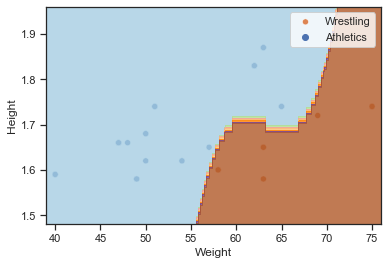

In [11]:
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
sns.set_theme(style="ticks", color_codes=True)

sns.scatterplot('Weight', 'Height', data=dataset, hue='Sport')
svc = SVC(kernel='rbf', C=100000,gamma=0.001)
svc.fit(X, y)

# X - some data in 2dimensional np.array
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# here "model" is your model's prediction (classification) function
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.legend(["Wrestling", "Athletics"])